### This is the Adverserial validation for the data:
### Beijin is at the first

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression

In [2]:
path='../ml_dataset/2018_kdd_cup_dataset/'
beji_aqi_2018=pd.read_csv(path+"beijing_201802_201803_aq.csv")
beji_aqi_2017_2018=pd.read_csv(path+"beijing_17_18_aq.csv")
beji_aqi_summary=pd.concat([beji_aqi_2018,beji_aqi_2017_2018],axis=0).sort_values(by=['utc_time'])


beji_aqi_summary=beji_aqi_summary.set_index([list(range(0,len(beji_aqi_summary)))])
beji_aqi_summary.sort_values(by='utc_time')

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2
0,yizhuang_aq,2017-01-01 14:00:00,278.0,362.0,117.0,5.7,6.0,2.0
20,wanshouxigong_aq,2017-01-01 14:00:00,416.0,474.0,140.0,0.6,7.0,5.0
21,wanliu_aq,2017-01-01 14:00:00,468.0,518.0,187.0,7.5,6.0,7.0
22,guanyuan_aq,2017-01-01 14:00:00,476.0,548.0,158.0,6.9,2.0,7.0
23,yongdingmennei_aq,2017-01-01 14:00:00,415.0,NaN,143.0,6.7,12.0,12.0
24,yongledian_aq,2017-01-01 14:00:00,329.0,NaN,130.0,5.5,6.0,12.0
26,qianmen_aq,2017-01-01 14:00:00,436.0,NaN,157.0,6.8,2.0,5.0
19,dongsihuan_aq,2017-01-01 14:00:00,390.0,394.0,99.0,6.8,4.0,11.0
27,nansanhuan_aq,2017-01-01 14:00:00,431.0,467.0,147.0,6.5,3.0,14.0
29,dingling_aq,2017-01-01 14:00:00,339.0,372.0,137.0,5.9,6.0,18.0


In [3]:
beijing_grid_sta=pd.read_csv(path+"Beijing_historical_meo_grid.csv")
beijing_grid_sta.sort_values(by='utc_time')

,stationName,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed/kph
0,beijing_grid_000,115.0,39.0,2017-01-01 00:00:00,-5.47,984.73,76.60,53.71,3.53
430,beijing_grid_430,117.0,40.0,2017-01-01 00:00:00,-5.29,1023.28,62.64,264.01,3.15
431,beijing_grid_431,117.0,40.1,2017-01-01 00:00:00,-5.27,1014.84,60.35,257.02,2.18
432,beijing_grid_432,117.0,40.2,2017-01-01 00:00:00,-5.26,1006.40,58.07,239.82,1.30
433,beijing_grid_433,117.0,40.3,2017-01-01 00:00:00,-5.12,1001.28,57.18,208.88,0.93
434,beijing_grid_434,117.0,40.4,2017-01-01 00:00:00,-4.93,997.81,56.98,176.47,0.97
435,beijing_grid_435,117.0,40.5,2017-01-01 00:00:00,-4.92,990.89,57.24,151.89,0.89
436,beijing_grid_436,117.0,40.6,2017-01-01 00:00:00,-5.31,977.04,58.41,78.07,0.49
429,beijing_grid_429,117.0,39.9,2017-01-01 00:00:00,-5.76,1024.26,71.21,276.48,3.01
437,beijing_grid_437,117.0,40.7,2017-01-01 00:00:00,-5.69,963.19,59.58,28.56,1.12


#### ADD location for the AQI station

In [4]:
beijingAqCsv_sta = pd.read_csv('Beijing_AirQuality_Stations.csv')

In [5]:
location_beijin={}
for i in range(0,len(beijingAqCsv_sta)):
    temp=beijingAqCsv_sta.iloc[i,:]
    if temp['Pollutant Species'] in list(beji_aqi_summary.groupby(["stationId"]).groups.keys()):
       location_beijin[temp['Pollutant Species']]=temp.values[1:].astype(float).tolist()[::-1]

In [6]:
def la_point(key):
    return location_beijin[key][0]

def lon_point(key):
    return location_beijin[key][1]


beji_aqi_summary['latitude']=beji_aqi_summary['stationId'].apply(lambda key: la_point(key))
beji_aqi_summary['longitude']=beji_aqi_summary['stationId'].apply(lambda key: lon_point(key))

In [7]:
beji_aqi_summary

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2,latitude,longitude
0,yizhuang_aq,2017-01-01 14:00:00,278.0,362.0,117.0,5.7,6.0,2.0,39.795,116.506
1,tongzhou_aq,2017-01-01 14:00:00,376.0,409.0,128.0,5.1,2.0,9.0,39.886,116.663
2,pingchang_aq,2017-01-01 14:00:00,495.0,588.0,152.0,7.6,5.0,5.0,40.217,116.230
3,fengtaihuayuan_aq,2017-01-01 14:00:00,391.0,496.0,134.0,6.5,6.0,5.0,39.863,116.279
4,gucheng_aq,2017-01-01 14:00:00,500.0,612.0,161.0,7.7,3.0,11.0,39.914,116.184
5,tiantan_aq,2017-01-01 14:00:00,357.0,449.0,116.0,6.2,2.0,4.0,39.886,116.407
6,yanqin_aq,2017-01-01 14:00:00,206.0,227.0,84.0,4.4,43.0,45.0,40.453,115.972
7,aotizhongxin_aq,2017-01-01 14:00:00,453.0,467.0,156.0,7.2,3.0,9.0,39.982,116.397
8,miyun_aq,2017-01-01 14:00:00,465.0,607.0,121.0,NaN,2.0,5.0,40.370,116.832
9,donggaocun_aq,2017-01-01 14:00:00,377.0,NaN,123.0,5.5,2.0,6.0,40.100,117.120


In [8]:
#left=beijing_grid_sta.drop(contaniner_1)
#right=beji_aqi_summary_copy.drop(contaniner_2)
#pd.merge(left, right, how='left', on=["utc_time"])


# Level one adverserial detection:
1.just use AQI information
2.encode the other features NAN to 9999

### drop the all NAN column

In [9]:
beji_aqi_summary_copy=beji_aqi_summary.copy()

In [10]:
true_false_table=(beji_aqi_summary['PM2.5'].isnull()) * \
(beji_aqi_summary['PM10'].isnull()) * \
(beji_aqi_summary['NO2'].isnull()) * \
(beji_aqi_summary['CO'].isnull()) * \
(beji_aqi_summary['O3'].isnull()) * \
(beji_aqi_summary['SO2'].isnull())

/home/paslab/.local/lib/python3.5/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [11]:
beji_aqi_summary_copy=beji_aqi_summary_copy.loc[~true_false_table,:]

In [12]:
beji_aqi_summary_copy.loc[beji_aqi_summary_copy["PM2.5"].isnull(),:]

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2,latitude,longitude
1535,guanyuan_aq,2017-01-03 09:00:00,NaN,404.0,186.0,NaN,NaN,NaN,39.929,116.339
1568,guanyuan_aq,2017-01-03 10:00:00,NaN,501.0,207.0,7.1,NaN,24.0,39.929,116.339
1598,guanyuan_aq,2017-01-03 11:00:00,NaN,547.0,202.0,7.5,NaN,19.0,39.929,116.339
1637,guanyuan_aq,2017-01-03 12:00:00,NaN,594.0,201.0,7.7,NaN,17.0,39.929,116.339
1647,guanyuan_aq,2017-01-03 13:00:00,NaN,631.0,197.0,8.1,NaN,13.0,39.929,116.339
1710,guanyuan_aq,2017-01-03 14:00:00,NaN,657.0,189.0,8.2,2.0,13.0,39.929,116.339
1716,guanyuan_aq,2017-01-03 15:00:00,NaN,662.0,187.0,8.4,2.0,11.0,39.929,116.339
1778,guanyuan_aq,2017-01-03 16:00:00,NaN,813.0,186.0,0.9,2.0,11.0,39.929,116.339
1786,guanyuan_aq,2017-01-03 17:00:00,NaN,787.0,180.0,9.8,2.0,11.0,39.929,116.339
1831,guanyuan_aq,2017-01-03 18:00:00,NaN,783.0,169.0,9.7,2.0,11.0,39.929,116.339


In [13]:
beji_aqi_summary_copy["test"]=0
beji_aqi_summary_copy.loc[beji_aqi_summary_copy["PM2.5"].isnull(),"test"]=1

In [14]:
beji_aqi_summary_copy.loc[beji_aqi_summary_copy["PM2.5"].isnull()]

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2,latitude,longitude,test
1535,guanyuan_aq,2017-01-03 09:00:00,NaN,404.0,186.0,NaN,NaN,NaN,39.929,116.339,1
1568,guanyuan_aq,2017-01-03 10:00:00,NaN,501.0,207.0,7.1,NaN,24.0,39.929,116.339,1
1598,guanyuan_aq,2017-01-03 11:00:00,NaN,547.0,202.0,7.5,NaN,19.0,39.929,116.339,1
1637,guanyuan_aq,2017-01-03 12:00:00,NaN,594.0,201.0,7.7,NaN,17.0,39.929,116.339,1
1647,guanyuan_aq,2017-01-03 13:00:00,NaN,631.0,197.0,8.1,NaN,13.0,39.929,116.339,1
1710,guanyuan_aq,2017-01-03 14:00:00,NaN,657.0,189.0,8.2,2.0,13.0,39.929,116.339,1
1716,guanyuan_aq,2017-01-03 15:00:00,NaN,662.0,187.0,8.4,2.0,11.0,39.929,116.339,1
1778,guanyuan_aq,2017-01-03 16:00:00,NaN,813.0,186.0,0.9,2.0,11.0,39.929,116.339,1
1786,guanyuan_aq,2017-01-03 17:00:00,NaN,787.0,180.0,9.8,2.0,11.0,39.929,116.339,1
1831,guanyuan_aq,2017-01-03 18:00:00,NaN,783.0,169.0,9.7,2.0,11.0,39.929,116.339,1


In [15]:
import re
def year(x):
    listofx=re.split('\-| |:',x)
    return float(listofx[0])
def month(x):
    listofx=re.split('\-| |:',x)
    return float(listofx[1])
def date(x):
    listofx=re.split('\-| |:',x)
    return float(listofx[2])
def hour(x):
    listofx=re.split('\-| |:',x)
    return float(listofx[3])
beji_aqi_summary_copy["year"]=beji_aqi_summary_copy["utc_time"].apply(lambda x:year(str(x)))
beji_aqi_summary_copy["month"]=beji_aqi_summary_copy["utc_time"].apply(lambda x:month(str(x)))
beji_aqi_summary_copy["date"]=beji_aqi_summary_copy["utc_time"].apply(lambda x:date(str(x)))
beji_aqi_summary_copy["hour"]=beji_aqi_summary_copy["utc_time"].apply(lambda x:hour(str(x)))

In [16]:
beji_aqi_summary_copy.tail()

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2,latitude,longitude,test,year,month,date,hour
360425,liulihe_aq,2018-03-31 15:00:00,136.0,204.0,61.0,1.1,50.0,NaN,39.580,116.000,0,2018.0,3.0,31.0,15.0
360426,nongzhanguan_aq,2018-03-31 15:00:00,148.0,200.0,161.0,1.7,2.0,10.0,39.937,116.461,0,2018.0,3.0,31.0,15.0
360427,yizhuang_aq,2018-03-31 15:00:00,137.0,192.0,166.0,1.6,5.0,9.0,39.795,116.506,0,2018.0,3.0,31.0,15.0
360428,tongzhou_aq,2018-03-31 15:00:00,197.0,355.0,139.0,1.3,19.0,18.0,39.886,116.663,0,2018.0,3.0,31.0,15.0
360429,guanyuan_aq,2018-03-31 15:00:00,139.0,191.0,151.0,2.1,2.0,8.0,39.929,116.339,0,2018.0,3.0,31.0,15.0


In [17]:
beji_aqi_summary_copy=beji_aqi_summary_copy.fillna(9999).copy()

In [18]:
train_cv=beji_aqi_summary_copy.loc[~beji_aqi_summary_copy["PM2.5"].isnull()].copy()
test_cv=beji_aqi_summary_copy.loc[beji_aqi_summary_copy["PM2.5"].isnull()].copy()

In [19]:
len(beji_aqi_summary_copy)

341795

In [20]:
train_cv=train_cv.drop(["PM2.5"],axis=1)
test_cv=test_cv.drop(["PM2.5"],axis=1)

In [21]:
train_cv.columns

Index(['stationId', 'utc_time', 'PM10', 'NO2', 'CO', 'O3', 'SO2', 'latitude',
       'longitude', 'test', 'year', 'month', 'date', 'hour'],
      dtype='object')

In [22]:
col=['year', 'month', 'date', 'hour', 'PM10', 'NO2', 'CO', 'O3', 'SO2', 'latitude',
       'longitude']

In [23]:
X_train=train_cv[col]
X_test=test_cv[col]
y=pd.concat([train_cv.test,test_cv.test])
data_cv = pd.concat([X_train, X_test])
data_cv.reset_index( inplace = True, drop = True )
y.reset_index( inplace = True, drop = True )
x=data_cv

In [24]:
predictions = np.zeros( y.shape )
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn import cross_validation as CV
cv = CV.StratifiedKFold( y, n_folds = 10, shuffle = True, random_state = 42)

clf=LogisticRegression()

for f, ( train_index, test_index ) in enumerate( cv ):
    
    print ("# fold {}".format( f + 1))
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_adcv = x.iloc[train_index]
    x_test_adcv = x.iloc[test_index]
    y_train_adcv = y.iloc[train_index]
    y_test_adcv = y.iloc[test_index]
    
    clf.fit( x_train_adcv.values, y_train_adcv.values )
    
    p = clf.predict_proba( x_test_adcv.values  )[:,1] # the probability of "1" class
    
    auc = roc_auc_score( y_test_adcv, p )
    logloss=log_loss(y_test_adcv,p)
    print ("# AUC: {:.2%}\n".format( auc )	)
    print ("# log_loss: {}\n".format( logloss )	)
    
    predictions[ test_index ] = p


/home/paslab/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# fold 1
TRAIN: [     0      1      3 ... 341792 341793 341794] TEST: [     2      7     16 ... 341745 341768 341791]
# AUC: 62.32%

# log_loss: 0.07262401903491571

# fold 2
TRAIN: [     1      2      3 ... 341792 341793 341794] TEST: [     0      6     17 ... 341767 341772 341786]
# AUC: 65.66%

# log_loss: 0.07198214782564609

# fold 3
TRAIN: [     0      1      2 ... 341791 341792 341793] TEST: [    11     12     33 ... 341762 341787 341794]
# AUC: 66.36%

# log_loss: 0.07170971218349631

# fold 4
TRAIN: [     0      1      2 ... 341791 341793 341794] TEST: [     4     10     31 ... 341774 341776 341792]
# AUC: 65.81%

# log_loss: 0.07180227036302071

# fold 5
TRAIN: [     0      1      2 ... 341792 341793 341794] TEST: [    38     39     46 ... 341758 341761 341781]
# AUC: 67.49%

# log_loss: 0.07139001282290888

# fold 6
TRAIN: [     0      2      3 ... 341792 341793 341794] TEST: [     1      8      9 ... 341759 341777 341779]
# AUC: 64.24%

# log_loss: 0.07208713379759485

# fo

The importance of the feature:(more important means it let the data's distribution more non-uniform)

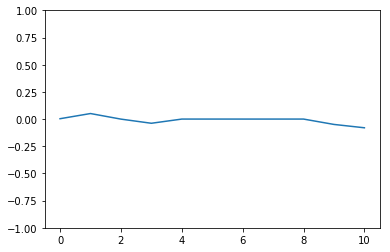

In [184]:
plt.clf()
plt.plot(clf.coef_.tolist()[0])
plt.ylim((-1,1))
plt.show()

In [185]:
clf.coef_.tolist()[0]

[0.0033923131141826574,
 0.050974129247011994,
 -0.00033555621527181967,
 -0.038492277955959886,
 5.758043984904923e-05,
 9.294092579446751e-05,
 6.334741114652572e-05,
 6.815299575917284e-05,
 8.917429716897549e-05,
 -0.049249485647623326,
 -0.08002929096363785]

In [186]:
X_train.columns

Index(['year', 'month', 'date', 'hour', 'PM10', 'NO2', 'CO', 'O3', 'SO2',
       'latitude', 'longitude'],
      dtype='object')

Seems 1, 3, 9,10(start from 0) thats is month , hour ,latitude, longitude, effect most

#### change to random forest for stronger classification, more strict validation

In [29]:
from sklearn.ensemble import RandomForestClassifier as RF
clf = RF( n_estimators =100,n_jobs=-1,random_state=42)

In [191]:
predictions = np.zeros( y.shape )
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn import cross_validation as CV
cv = CV.StratifiedKFold( y, n_folds = 10, shuffle = True, random_state = 42)


for f, ( train_index, test_index ) in enumerate( cv ):
    
    print ("# fold {}".format( f + 1))
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_adcv = x.iloc[train_index]
    x_test_adcv = x.iloc[test_index]
    y_train_adcv = y.iloc[train_index]
    y_test_adcv = y.iloc[test_index]
    
    clf.fit( x_train_adcv.values, y_train_adcv.values )
    
    p = clf.predict_proba( x_test_adcv.values  )[:,1] # the probability of "1" class
    
    auc = roc_auc_score( y_test_adcv, p )
    logloss=log_loss(y_test_adcv,p)
    print ("# AUC: {:.2%}\n".format( auc )	)
    print ("# log_loss: {}\n".format( logloss )	)
    
    predictions[ test_index ] = p


# fold 1
TRAIN: [     0      1      3 ... 341792 341793 341794] TEST: [     2      7     16 ... 341745 341768 341791]
# AUC: 93.65%

# log_loss: 0.06033833815330614

# fold 2
TRAIN: [     1      2      3 ... 341792 341793 341794] TEST: [     0      6     17 ... 341767 341772 341786]
# AUC: 93.66%

# log_loss: 0.059925210083378595

# fold 3
TRAIN: [     0      1      2 ... 341791 341792 341793] TEST: [    11     12     33 ... 341762 341787 341794]
# AUC: 94.17%

# log_loss: 0.057817055289591836

# fold 4
TRAIN: [     0      1      2 ... 341791 341793 341794] TEST: [     4     10     31 ... 341774 341776 341792]
# AUC: 93.51%

# log_loss: 0.06318163829975638

# fold 5
TRAIN: [     0      1      2 ... 341792 341793 341794] TEST: [    38     39     46 ... 341758 341761 341781]
# AUC: 93.41%

# log_loss: 0.06155896124743446

# fold 6
TRAIN: [     0      2      3 ... 341792 341793 341794] TEST: [     1      8      9 ... 341759 341777 341779]
# AUC: 94.44%

# log_loss: 0.05422586184139654

# 

OOps!! it's  not good.....

<Figure size 432x288 with 0 Axes>

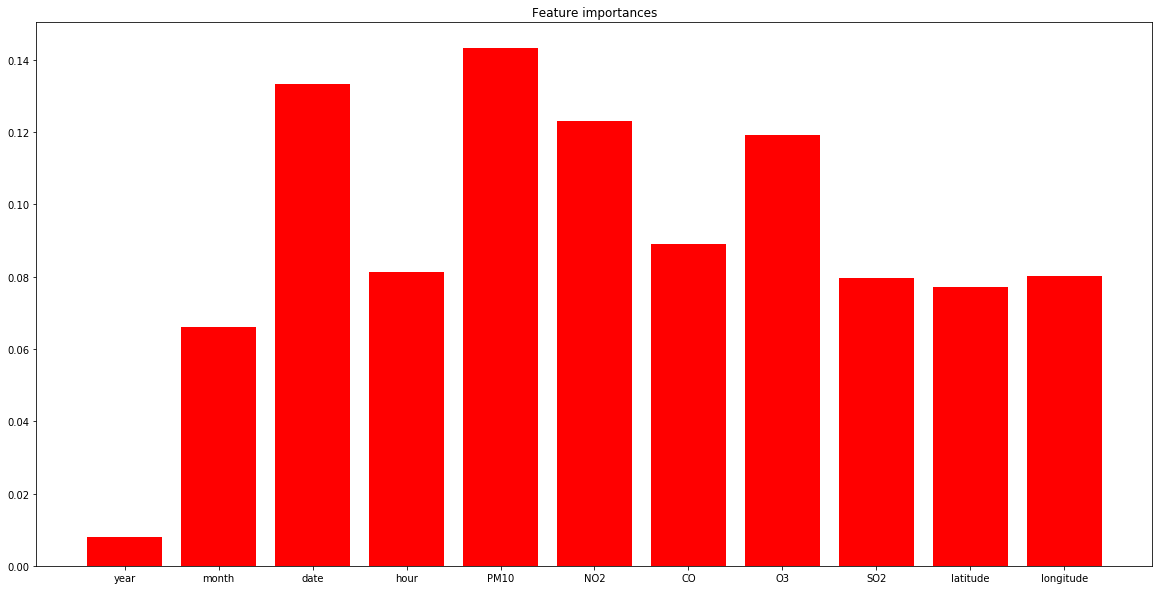

In [195]:
plt.clf()
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.xticks(range(X_train.shape[1]), X_train.columns.values)
plt.bar(range(X_train.shape[1]), clf.feature_importances_,
       color="r", align="center")
#plt.plot(clf.feature_importances_)
plt.show()

#### drop out the latitude and longitude

In [25]:
col=['year', 'month', 'date', 'hour', 'PM10', 'NO2', 'CO', 'O3', 'SO2']

In [26]:
X_train=train_cv[col]
X_test=test_cv[col]
y=pd.concat([train_cv.test,test_cv.test])
data_cv = pd.concat([X_train, X_test])
data_cv.reset_index( inplace = True, drop = True )
y.reset_index( inplace = True, drop = True )
x=data_cv

In [27]:
predictions = np.zeros( y.shape )
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn import cross_validation as CV
cv = CV.StratifiedKFold( y, n_folds = 10, shuffle = True, random_state = 42)

clf=LogisticRegression()

for f, ( train_index, test_index ) in enumerate( cv ):
    
    print ("# fold {}".format( f + 1))
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_adcv = x.iloc[train_index]
    x_test_adcv = x.iloc[test_index]
    y_train_adcv = y.iloc[train_index]
    y_test_adcv = y.iloc[test_index]
    
    clf.fit( x_train_adcv.values, y_train_adcv.values )
    
    p = clf.predict_proba( x_test_adcv.values  )[:,1] # the probability of "1" class
    
    auc = roc_auc_score( y_test_adcv, p )
    logloss=log_loss(y_test_adcv,p)
    print ("# AUC: {:.2%}\n".format( auc )	)
    print ("# log_loss: {}\n".format( logloss )	)
    
    predictions[ test_index ] = p


# fold 1
TRAIN: [     0      1      3 ... 341792 341793 341794] TEST: [     2      7     16 ... 341745 341768 341791]
# AUC: 62.30%

# log_loss: 0.07262368556457198

# fold 2
TRAIN: [     1      2      3 ... 341792 341793 341794] TEST: [     0      6     17 ... 341767 341772 341786]
# AUC: 65.65%

# log_loss: 0.07198668347671634

# fold 3
TRAIN: [     0      1      2 ... 341791 341792 341793] TEST: [    11     12     33 ... 341762 341787 341794]
# AUC: 66.27%

# log_loss: 0.07173976094475484

# fold 4
TRAIN: [     0      1      2 ... 341791 341793 341794] TEST: [     4     10     31 ... 341774 341776 341792]
# AUC: 65.70%

# log_loss: 0.07182169834336556

# fold 5
TRAIN: [     0      1      2 ... 341792 341793 341794] TEST: [    38     39     46 ... 341758 341761 341781]
# AUC: 67.53%

# log_loss: 0.07138059460120186

# fold 6
TRAIN: [     0      2      3 ... 341792 341793 341794] TEST: [     1      8      9 ... 341759 341777 341779]
# AUC: 64.28%

# log_loss: 0.07207952798595493

# fo

In [30]:
clf = RF( n_estimators =100,n_jobs=-1,random_state=42)

In [31]:
predictions = np.zeros( y.shape )
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn import cross_validation as CV
cv = CV.StratifiedKFold( y, n_folds = 10, shuffle = True, random_state = 42)


for f, ( train_index, test_index ) in enumerate( cv ):
    
    print ("# fold {}".format( f + 1))
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_adcv = x.iloc[train_index]
    x_test_adcv = x.iloc[test_index]
    y_train_adcv = y.iloc[train_index]
    y_test_adcv = y.iloc[test_index]
    
    clf.fit( x_train_adcv.values, y_train_adcv.values )
    
    p = clf.predict_proba( x_test_adcv.values  )[:,1] # the probability of "1" class
    
    auc = roc_auc_score( y_test_adcv, p )
    logloss=log_loss(y_test_adcv,p)
    print ("# AUC: {:.2%}\n".format( auc )	)
    print ("# log_loss: {}\n".format( logloss )	)
    
    predictions[ test_index ] = p


# fold 1
TRAIN: [     0      1      3 ... 341792 341793 341794] TEST: [     2      7     16 ... 341745 341768 341791]
# AUC: 88.80%

# log_loss: 0.08723309612975387

# fold 2
TRAIN: [     1      2      3 ... 341792 341793 341794] TEST: [     0      6     17 ... 341767 341772 341786]
# AUC: 87.95%

# log_loss: 0.09367223761343724

# fold 3
TRAIN: [     0      1      2 ... 341791 341792 341793] TEST: [    11     12     33 ... 341762 341787 341794]
# AUC: 88.95%

# log_loss: 0.0874753151692124

# fold 4
TRAIN: [     0      1      2 ... 341791 341793 341794] TEST: [     4     10     31 ... 341774 341776 341792]
# AUC: 87.30%

# log_loss: 0.09625129055701202

# fold 5
TRAIN: [     0      1      2 ... 341792 341793 341794] TEST: [    38     39     46 ... 341758 341761 341781]
# AUC: 89.21%

# log_loss: 0.08388027423599821

# fold 6
TRAIN: [     0      2      3 ... 341792 341793 341794] TEST: [     1      8      9 ... 341759 341777 341779]
# AUC: 87.59%

# log_loss: 0.09347948432574271

# fol

<Figure size 432x288 with 0 Axes>

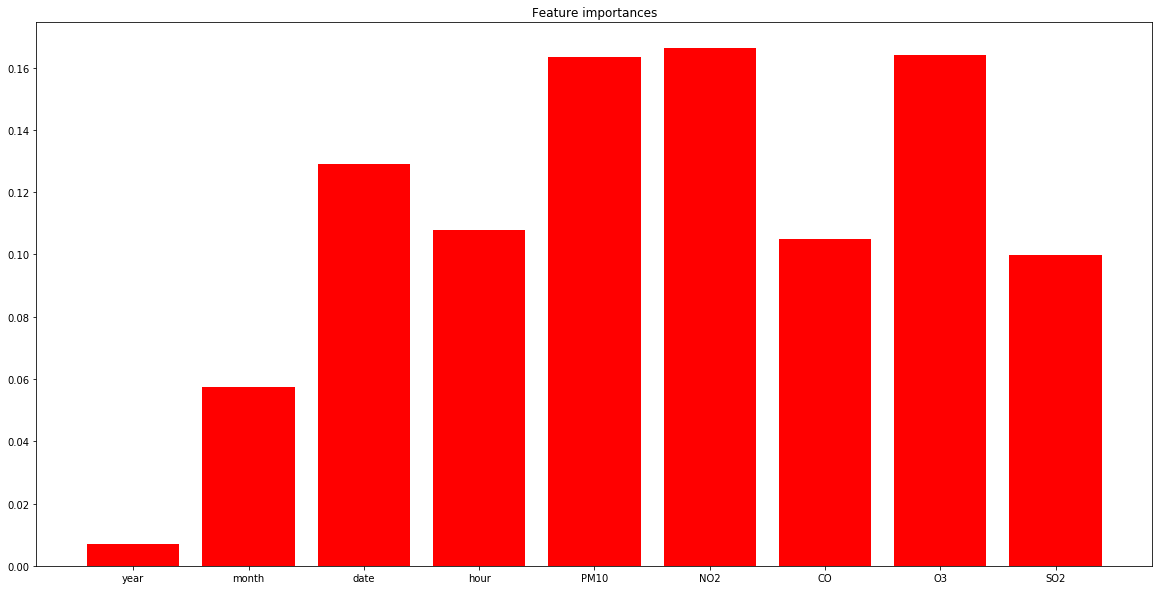

In [32]:
plt.clf()
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.xticks(range(X_train.shape[1]), col)
plt.bar(range(X_train.shape[1]), clf.feature_importances_,
       color="r", align="center")
#plt.plot(clf.feature_importances_)
plt.show()

 It's not good for the NAN impute prediction, the different distribution has been detected by the algorithm

Specify to high freqeuncy NAN AQI station: At dongsihuan

In [87]:
beji_aqi_summary_copy.reset_index( inplace = True, drop = True )
temp_data=beji_aqi_summary_copy.iloc[beji_aqi_summary_copy.groupby(['stationId']).groups['dongsihuan_aq']]


In [88]:
temp_data.reset_index( inplace = True, drop = True )

In [89]:
temp_data

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2,latitude,longitude,test,year,month,date,hour
0,dongsihuan_aq,2017-01-01 14:00:00,390.0,394.0,99.0,6.8,4.0,11.0,39.939,116.483,0,2017.0,1.0,1.0,14.0
1,dongsihuan_aq,2017-01-01 15:00:00,390.0,9999.0,92.0,6.6,4.0,8.0,39.939,116.483,0,2017.0,1.0,1.0,15.0
2,dongsihuan_aq,2017-01-01 16:00:00,374.0,396.0,81.0,7.2,5.0,10.0,39.939,116.483,0,2017.0,1.0,1.0,16.0
3,dongsihuan_aq,2017-01-01 17:00:00,401.0,419.0,71.0,7.3,4.0,13.0,39.939,116.483,0,2017.0,1.0,1.0,17.0
4,dongsihuan_aq,2017-01-01 18:00:00,408.0,419.0,58.0,6.9,3.0,8.0,39.939,116.483,0,2017.0,1.0,1.0,18.0
5,dongsihuan_aq,2017-01-01 19:00:00,413.0,418.0,75.0,0.8,4.0,6.0,39.939,116.483,0,2017.0,1.0,1.0,19.0
6,dongsihuan_aq,2017-01-01 20:00:00,408.0,9999.0,71.0,0.7,9999.0,7.0,39.939,116.483,0,2017.0,1.0,1.0,20.0
7,dongsihuan_aq,2017-01-01 21:00:00,363.0,9999.0,91.0,6.1,5.0,10.0,39.939,116.483,0,2017.0,1.0,1.0,21.0
8,dongsihuan_aq,2017-01-01 22:00:00,198.0,9999.0,99.0,4.1,4.0,4.0,39.939,116.483,0,2017.0,1.0,1.0,22.0
9,dongsihuan_aq,2017-01-01 23:00:00,108.0,9999.0,88.0,2.5,4.0,3.0,39.939,116.483,0,2017.0,1.0,1.0,23.0


In [90]:
temp_data['test'].value_counts()

0    8071
1     209
Name: test, dtype: int64

In [91]:
train_cv=temp_data.loc[~temp_data["PM2.5"].isnull()].copy()
test_cv=temp_data.loc[temp_data["PM2.5"].isnull()].copy()

X_train=train_cv[col]
X_test=test_cv[col]
y=pd.concat([train_cv.test,test_cv.test])
data_cv = pd.concat([X_train, X_test])
data_cv.reset_index( inplace = True, drop = True )
y.reset_index( inplace = True, drop = True )
x=data_cv

In [92]:
clf = RF( n_estimators =100,n_jobs=-1,random_state=42)

In [93]:
predictions = np.zeros( y.shape )
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn import cross_validation as CV
cv = CV.StratifiedKFold( y, n_folds = 10, shuffle = True, random_state = 42)


for f, ( train_index, test_index ) in enumerate( cv ):
    
    print ("# fold {}".format( f + 1))
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train_adcv = x.iloc[train_index]
    x_test_adcv = x.iloc[test_index]
    y_train_adcv = y.iloc[train_index]
    y_test_adcv = y.iloc[test_index]
    
    clf.fit( x_train_adcv.values, y_train_adcv.values )
    
    p = clf.predict_proba( x_test_adcv.values  )[:,1] # the probability of "1" class
    
    auc = roc_auc_score( y_test_adcv, p )
    logloss=log_loss(y_test_adcv,p)
    print(auc)
    print ("# AUC: {:.2%}\n".format( auc )	)
    print ("# log_loss: {}\n".format( logloss )	)
    
    predictions[ test_index ] = p


# fold 1
0.7683580858085808
# AUC: 76.84%

# log_loss: 0.24724458822114126

# fold 2
0.8971499380421315
# AUC: 89.71%

# log_loss: 0.11774152450911561

# fold 3
0.8768808638697114
# AUC: 87.69%

# log_loss: 0.12188460046939067

# fold 4
0.8784150587124564
# AUC: 87.84%

# log_loss: 0.12182465969906894

# fold 5
0.9311677583053047
# AUC: 93.12%

# log_loss: 0.10288397845149193

# fold 6
0.8907476249483685
# AUC: 89.07%

# log_loss: 0.1459422481182002

# fold 7
0.91243287897563
# AUC: 91.24%

# log_loss: 0.11118998470216977

# fold 8
0.86133238921343
# AUC: 86.13%

# log_loss: 0.1594039168431343

# fold 9
0.8810113884463326
# AUC: 88.10%

# log_loss: 0.15280946626137162

# fold 10
0.8472118959107806
# AUC: 84.72%

# log_loss: 0.15822845812005226



<Figure size 432x288 with 0 Axes>

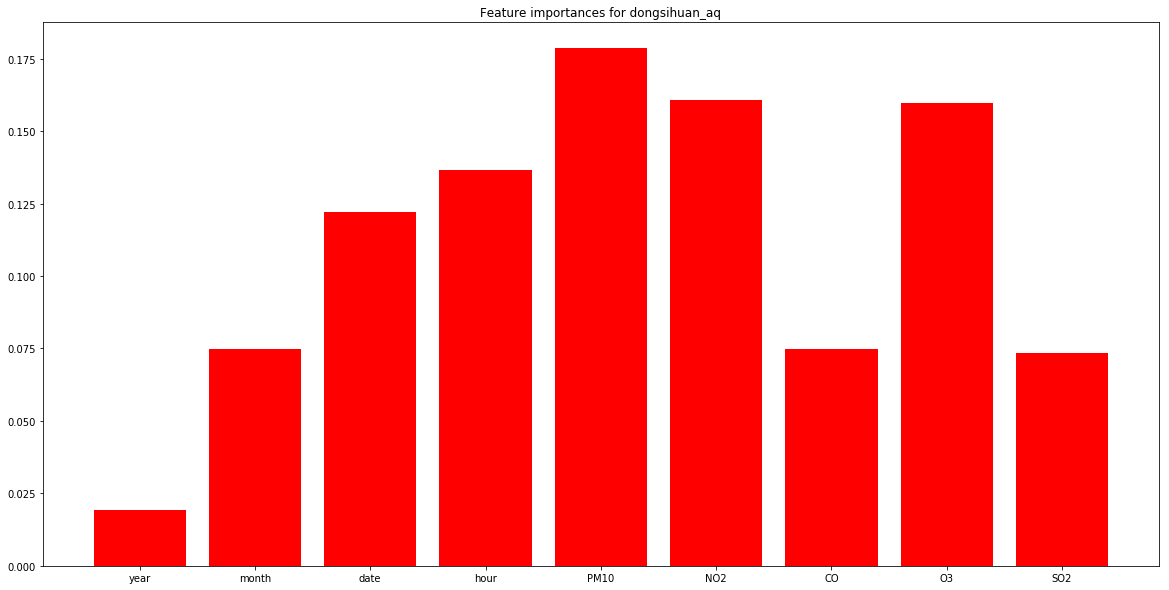

In [68]:
plt.clf()
plt.figure(figsize=(20,10))
plt.title("Feature importances for dongsihuan_aq")
plt.xticks(range(X_train.shape[1]), col)
plt.bar(range(X_train.shape[1]), clf.feature_importances_,
       color="r", align="center")
#plt.plot(clf.feature_importances_)
plt.show()

Still high, then we did it by training batch on each station

In [76]:
col

['year', 'month', 'date', 'hour', 'PM10', 'NO2', 'CO', 'O3', 'SO2']

In [97]:
import gc
#del temp_data
gc.collect()
for key in beji_aqi_summary.groupby(['stationId']).groups:
    clf = RF( n_estimators =100,n_jobs=-1,random_state=42)
    print(key)
    temp_data=beji_aqi_summary_copy.iloc[beji_aqi_summary_copy.groupby(['stationId']).groups[key]]
    print(temp_data['test'].value_counts())
    train_cv=temp_data.loc[~temp_data["PM2.5"].isnull()].copy()
    test_cv=temp_data.loc[temp_data["PM2.5"].isnull()].copy()
    X_train=train_cv[col]
    X_test=test_cv[col]
    y=pd.concat([train_cv.test,test_cv.test])
    data_cv = pd.concat([X_train, X_test])
    data_cv.reset_index( inplace = True, drop = True )
    y.reset_index( inplace = True, drop = True )
    x=data_cv
    cv = CV.StratifiedKFold( y, n_folds = 10, shuffle = True, random_state = 42)
    accumulator_logloss=[]
    accumulator_AUC=[]
    predictions = np.zeros( y.shape )
    for f, ( train_index, test_index ) in enumerate( cv ):
    
        #print ("# fold {}".format( f + 1))
    #print("TRAIN:", train_index, "TEST:", test_index)
        x_train_adcv = x.iloc[train_index]
        x_test_adcv = x.iloc[test_index]
        y_train_adcv = y.iloc[train_index]
        y_test_adcv = y.iloc[test_index]
    
        clf.fit( x_train_adcv.values, y_train_adcv.values )
    
        p = clf.predict_proba( x_test_adcv.values  )[:,1] # the probability of "1" class
    
        auc = roc_auc_score( y_test_adcv, p )
        logloss=log_loss(y_test_adcv,p)
        accumulator_AUC.append( auc )
        accumulator_logloss.append(logloss)
        print ("# AUC: {:.2%}\n".format( auc )	)
        print ("# log_loss: {}\n".format( logloss )	)
        predictions[ test_index ] = p
        
    print ("** mean AUC: {:.2%}\n".format(np.mean(accumulator_AUC,axis=0)))
    print ("** mean log_loss: {}\n".format(np.mean(accumulator_logloss,axis=0)))
    print ("========================================")
    del accumulator_AUC, accumulator_logloss
    del temp_data
    
    


beibuxinqu_aq
0    9745
1      91
Name: test, dtype: int64
# AUC: 91.76%

# log_loss: 0.05945712100274736

# AUC: 95.47%

# log_loss: 0.023339114680666687

# AUC: 98.67%

# log_loss: 0.018955118399552617

# AUC: 95.15%

# log_loss: 0.028670193521036304

# AUC: 98.90%

# log_loss: 0.017591520538587393

# AUC: 79.51%

# log_loss: 0.11807131285771513

# AUC: 79.32%

# log_loss: 0.12109662226977874

# AUC: 72.80%

# log_loss: 0.15573626289644213

# AUC: 98.26%

# log_loss: 0.022207297373046584

# AUC: 86.78%

# log_loss: 0.0852597431718556

** mean AUC: 89.66%

** mean log_loss: 0.06503843067114286

aotizhongxin_aq
0    10093
1      111
Name: test, dtype: int64
# AUC: 87.99%

# log_loss: 0.09228408089574457

# AUC: 98.94%

# log_loss: 0.021956711268468942

# AUC: 86.97%

# log_loss: 0.08768536657351321

# AUC: 99.67%

# log_loss: 0.01887690366801069

# AUC: 99.95%

# log_loss: 0.014135825020188323

# AUC: 93.58%

# log_loss: 0.05455072835319491

# AUC: 99.87%

# log_loss: 0.015393001513526

# AUC: 88.59%

# log_loss: 0.04165638748891263

** mean AUC: 91.48%

** mean log_loss: 0.03599979040471362

zhiwuyuan_aq
0    6566
1     253
Name: test, dtype: int64
# AUC: 99.51%

# log_loss: 0.042975005070277475

# AUC: 97.39%

# log_loss: 0.05948029332637118

# AUC: 98.40%

# log_loss: 0.05519048640242308

# AUC: 97.81%

# log_loss: 0.05276774100325222

# AUC: 99.68%

# log_loss: 0.035078503531704185

# AUC: 99.44%

# log_loss: 0.04077394464395162

# AUC: 97.85%

# log_loss: 0.042652568050893715

# AUC: 95.02%

# log_loss: 0.09182894988912362

# AUC: 99.06%

# log_loss: 0.03906667708047253

# AUC: 95.26%

# log_loss: 0.10210791273537756

** mean AUC: 97.94%

** mean log_loss: 0.05619220817338472

wanliu_aq
0    10117
1       90
Name: test, dtype: int64
# AUC: 93.25%

# log_loss: 0.048833562855446815

# AUC: 86.81%

# log_loss: 0.07751542480621423

# AUC: 97.12%

# log_loss: 0.02046357039727159

# AUC: 94.71%

# log_loss: 0.02532146301673822

# AUC: 85.25%

# log_loss: 0.086130351864

# AUC: 89.72%

# log_loss: 0.07604928555649954

# AUC: 98.37%

# log_loss: 0.03041581059420153

# AUC: 98.08%

# log_loss: 0.03346980995667244

** mean AUC: 91.88%

** mean log_loss: 0.0825271456619682

donggaocun_aq
0    9623
1     114
Name: test, dtype: int64
# AUC: 93.74%

# log_loss: 0.05981642649384034

# AUC: 93.91%

# log_loss: 0.05543147259533604

# AUC: 88.81%

# log_loss: 0.09267639922102082

# AUC: 89.51%

# log_loss: 0.08637501951578594

# AUC: 87.11%

# log_loss: 0.09306191819181008

# AUC: 91.01%

# log_loss: 0.06325250899561931

# AUC: 99.74%

# log_loss: 0.0194712866694386

# AUC: 97.02%

# log_loss: 0.028646405094361872

# AUC: 85.76%

# log_loss: 0.09753267685335328

# AUC: 98.06%

# log_loss: 0.026784508174558394

** mean AUC: 92.47%

** mean log_loss: 0.06230486218051247

miyun_aq
0    10034
1       90
Name: test, dtype: int64
# AUC: 92.00%

# log_loss: 0.05178394435227942

# AUC: 80.28%

# log_loss: 0.11258780434775739

# AUC: 98.57%

# log_loss: 0.0222377302669595

# Level two adverserial detection

### Preprocessing
#### binding by time slice, time slice( time stamp) align

In [ ]:
start=time.time()
a = set(beijing_grid_sta.groupby(["utc_time"]).groups.keys())
b = set(beji_aqi_summary.groupby(["utc_time"]).groups.keys())
exclusive=(a ^ b)
beijing_grid_sta_copy=beijing_grid_sta.copy() #a
beji_aqi_summary_copy=beji_aqi_summary.copy() #b
first_time_1=1
first_time_2=1
for timeslice in exclusive:
    if timeslice in a:
        if first_time_1 is 1:
            first_time_1=0
            contaniner_1=np.array(beijing_grid_sta.groupby(["utc_time"]).groups[timeslice])
        else:
            new=np.array(beijing_grid_sta.groupby(["utc_time"]).groups[timeslice])
            contaniner_1=np.append(contaniner_1,new)
    else:
        if first_time_2 is 1:
            first_time_2=0
            contaniner_2=np.array(beji_aqi_summary.groupby(["utc_time"]).groups[timeslice])
        else:
            new=np.array(beji_aqi_summary.groupby(["utc_time"]).groups[timeslice])
            contaniner_2=np.append(contaniner_2,new)

contaniner_1=np.sort(contaniner_1) 
contaniner_2=np.sort(contaniner_2) 
end=time.time()
print("cost time:"+ str(end-start))

In [ ]:
import pickle
pickle.dump(contaniner_1,open("Beijin_grid_station(drop index).pkl", "wb"))
pickle.dump(contaniner_2,open("Beijin_AQI_station(drop index).pkl", "wb"))

In [ ]:
beijing_grid_sta.drop(contaniner_1)

In [31]:
beijing_grid_sta=beijing_grid_sta.drop(contaniner_1)

In [ ]:
beji_aqi_summary_copy=beji_aqi_summary_copy.drop(contaniner_2)

In [40]:
beijing_grid_sta.columns

Index(['stationName', 'longitude', 'latitude', 'utc_time', 'temperature',
       'pressure', 'humidity', 'wind_direction', 'wind_speed/kph'],
      dtype='object')

In [65]:
col=['utc_time', 'temperature',
       'pressure', 'humidity', 'wind_direction', 'wind_speed/kph']
gp=beijing_grid_sta[col].groupby(by=["utc_time"])

In [66]:
gp.mean()

,temperature,pressure,humidity,wind_direction,wind_speed/kph
utc_time,,,,,
2017-01-01 14:00:00,-2.937343,973.012381,59.271767,297.573026,8.135100
2017-01-01 15:00:00,-3.073978,973.186359,59.480630,301.197896,9.037988
2017-01-01 16:00:00,-3.284685,973.287127,58.416559,306.058095,9.265806
2017-01-01 17:00:00,-3.495207,973.387112,57.352427,309.745791,9.601167
2017-01-01 18:00:00,-3.705868,973.487665,56.288249,310.809401,10.033011
2017-01-01 19:00:00,-4.030215,973.682243,55.899601,306.101106,9.610200
2017-01-01 20:00:00,-4.354424,973.876897,55.510922,297.747158,9.295392
2017-01-01 21:00:00,-4.678618,974.071229,55.122396,288.609032,9.101813
2017-01-01 22:00:00,-4.859908,974.435515,54.690661,279.580276,8.522227


In [57]:
beijing_grid_sta.merge(gp, on=["utc_time"], how='left')

ValueError: can not merge DataFrame with instance of type <class 'pandas.core.groupby.DataFrameGroupBy'>

In [13]:
beijing_grid_sta.groupby(["utc_time"]).groups[timeslice]

Int64Index([5123370, 5123371, 5123372, 5123373, 5123374, 5123375, 5123376,
            5123377, 5123378, 5123379,
            ...
            5124011, 5124012, 5124013, 5124014, 5124015, 5124016, 5124017,
            5124018, 5124019, 5124020],
           dtype='int64', length=651)

In [14]:
type(beijing_grid_sta.groupby(["utc_time"]).groups[timeslice])

pandas.core.indexes.numeric.Int64Index

In [15]:
np.array(beijing_grid_sta.groupby(["utc_time"]).groups[timeslice])

array([5123370, 5123371, 5123372, 5123373, 5123374, 5123375, 5123376,
       5123377, 5123378, 5123379, 5123380, 5123381, 5123382, 5123383,
       5123384, 5123385, 5123386, 5123387, 5123388, 5123389, 5123390,
       5123391, 5123392, 5123393, 5123394, 5123395, 5123396, 5123397,
       5123398, 5123399, 5123400, 5123401, 5123402, 5123403, 5123404,
       5123405, 5123406, 5123407, 5123408, 5123409, 5123410, 5123411,
       5123412, 5123413, 5123414, 5123415, 5123416, 5123417, 5123418,
       5123419, 5123420, 5123421, 5123422, 5123423, 5123424, 5123425,
       5123426, 5123427, 5123428, 5123429, 5123430, 5123431, 5123432,
       5123433, 5123434, 5123435, 5123436, 5123437, 5123438, 5123439,
       5123440, 5123441, 5123442, 5123443, 5123444, 5123445, 5123446,
       5123447, 5123448, 5123449, 5123450, 5123451, 5123452, 5123453,
       5123454, 5123455, 5123456, 5123457, 5123458, 5123459, 5123460,
       5123461, 5123462, 5123463, 5123464, 5123465, 5123466, 5123467,
       5123468, 5123

In [16]:
timeslice

'2017-11-24 22:00:00'

In [17]:
'2017-11-24 20:00:00'

'2017-11-24 20:00:00'

In [18]:
np.append([1, 2, 3], [4, 5, 6])

array([1, 2, 3, 4, 5, 6])

In [24]:
from sklearn.linear_model import LogisticRegression